In [ ]:
!mkdir /root/.kaggle
!echo '{"username":"crekkt","key":"20605e97f88baa2a583401d4d07f2840"}' > /root/.kaggle/kaggle.json
!cat /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download -d jessicali9530/celeba-dataset

{"username":"crekkt","key":"20605e97f88baa2a583401d4d07f2840"}
 99% 1.31G/1.33G [00:16<00:00, 60.4MB/s]
100% 1.33G/1.33G [00:16<00:00, 88.4MB/s]


In [ ]:
import tensorflow as tf
tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
tf.debugging.set_log_device_placement(True)

Num GPUs Available:  1


In [ ]:
# !rm -rf ./img_align_celeba;
!unzip ./celeba-dataset.zip

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
from os import listdir
from os.path import isfile, join

In [ ]:
filenames = [f for f in listdir('./img_align_celeba/img_align_celeba/') if isfile(join('./img_align_celeba/img_align_celeba/', f))]

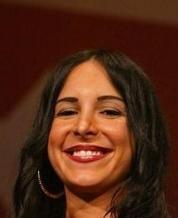

(218, 178, 3)

In [ ]:
index = 10377
im = cv2.imread(join('./img_align_celeba/img_align_celeba/', filenames[index]))
cv2_imshow(im)
im.shape
# print(len(filenames)) # 202599

In [ ]:
df_attr = pd.read_csv('./list_attr_celeba.csv')
df_attr

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,Blurry,Brown_Hair,Bushy_Eyebrows,Chubby,Double_Chin,Eyeglasses,Goatee,Gray_Hair,Heavy_Makeup,High_Cheekbones,Male,Mouth_Slightly_Open,Mustache,Narrow_Eyes,No_Beard,Oval_Face,Pale_Skin,Pointy_Nose,Receding_Hairline,Rosy_Cheeks,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,1,-1,1,-1,-1,1,-1,-1,1,-1,-1,-1,1,1,-1,1,-1,1,-1,-1,1
1,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,1,-1,1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,1
2,000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,1,1,-1,-1,1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,1
3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,1,-1,-1,-1,-1,1,-1,1,-1,1,1,-1,1
4,000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,1,1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202594,202595.jpg,-1,-1,1,-1,-1,-1,1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,1
202595,202596.jpg,-1,-1,-1,-1,-1,1,1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,1,1,-1,1,1,-1,1,-1,-1,-1,-1,1,1,-1,-1,-1,-1,-1,-1,1
202596,202597.jpg,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,1,1,1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,1
202597,202598.jpg,-1,1,1,-1,-1,-1,1,-1,1,-1,-1,-1,1,-1,-1,-1,-1,-1,1,1,-1,-1,-1,-1,1,1,-1,1,-1,1,-1,1,-1,1,1,-1,1,-1,-1,1


In [ ]:
df_smiling = df_attr[['image_id', 'Smiling']]
df_smiling = df_smiling.replace(to_replace=-1, value='no')
df_smiling = df_smiling.replace(to_replace=1, value='yes')
df_smiling

,image_id,Smiling
0,000001.jpg,yes
1,000002.jpg,yes
2,000003.jpg,no
3,000004.jpg,no
4,000005.jpg,no
...,...,...
202594,202595.jpg,no
202595,202596.jpg,yes
202596,202597.jpg,yes
202597,202598.jpg,yes


In [ ]:
df_smiling.head(100000).groupby('Smiling').count()

,image_id
Smiling,
no,52155
yes,47845


In [ ]:
df_smiling = df_smiling.head(100000)

In [ ]:
df_eval_part = pd.read_csv('./list_eval_partition.csv')
df_eval_part[df_eval_part['partition']==0].shape

(162770, 2)

In [ ]:
df_bbox = pd.read_csv('./list_bbox_celeba.csv')
df_bbox

,image_id,x_1,y_1,width,height
0,000001.jpg,95,71,226,313
1,000002.jpg,72,94,221,306
2,000003.jpg,216,59,91,126
3,000004.jpg,622,257,564,781
4,000005.jpg,236,109,120,166
...,...,...,...,...,...
202594,202595.jpg,1381,91,221,306
202595,202596.jpg,137,129,114,158
202596,202597.jpg,53,76,91,126
202597,202598.jpg,195,28,91,126


In [ ]:
print(df_eval_part[df_eval_part['partition']==0].shape) # Train
print(df_eval_part[df_eval_part['partition']==1].shape) # Val
print(df_eval_part[df_eval_part['partition']==2].shape) # Test

(162770, 2)
(19867, 2)
(19962, 2)


In [ ]:
from keras_preprocessing.image import ImageDataGenerator
datagen=ImageDataGenerator(rescale=1./255,
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=None,
    shear_range=0.0,
    zoom_range=0.1,
    channel_shift_range=0.0,
    fill_mode="nearest",
    cval=0.0,
    horizontal_flip=True,
    vertical_flip=False,
    validation_split=0.3
)

train_generator = datagen.flow_from_dataframe(
    dataframe=df_smiling,
    directory='./img_align_celeba/img_align_celeba/',
    x_col="image_id",
    y_col='Smiling',
    weight_col=None,
    target_size=(75, 75),
    color_mode="rgb",
    classes=None,
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=None,
    save_to_dir=None,
    save_prefix="",
    save_format="png",
    subset='training',
    interpolation="nearest",
    validate_filenames=True
)

validation_generator = datagen.flow_from_dataframe(
    dataframe=df_smiling,
    directory='./img_align_celeba/img_align_celeba/',
    x_col="image_id",
    y_col='Smiling',
    weight_col=None,
    target_size=(75, 75),
    color_mode="rgb",
    classes=None,
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=None,
    save_to_dir=None,
    save_prefix="",
    save_format="png",
    subset='validation',
    interpolation="nearest",
    validate_filenames=True
)

Found 70000 validated image filenames belonging to 2 classes.
Found 30000 validated image filenames belonging to 2 classes.


In [ ]:
train_generator[0][1]

In [ ]:
validation_generator[0][1]

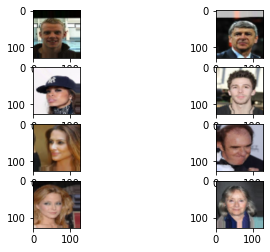

In [ ]:
import matplotlib.pyplot as plt

for i in range(0, 8):
  plt.subplot(4,2,i+1)
  plt.imshow(cv2.resize(validation_generator[0][0][i], (128,128)), cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [ ]:
import tensorflow as tf

In [ ]:
# import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
# from keras import backend as K
# import keras
from tensorflow.keras.models import Model

In [ ]:
model = tf.keras.applications.ResNet50(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(75, 75, 3),
    pooling=None,
    classes=2,
)

In [ ]:
# for layer in model.layers[:-5]:
#   layer.trainable = False
# for layes in model.layers[-5:]:
#   layer.trainable = True

for layer in model.layers:
  layer.trainable = True

In [ ]:
keras.__version__

'2.3.1'

In [ ]:
x = Flatten()(model.output)
x = Dense(256, activation='relu')(x)
x = Dense(32, activation='relu')(x)

x = Dense(2, activation='softmax')(x)

model = Model(model.input, x)

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
# model.summary()

In [ ]:
print(train_generator[1][1])
df_attr

In [ ]:
batch_size = 32
nb_epochs = 5

history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    epochs = nb_epochs)

Streaming output truncated to the last 5000 lines.
2187/2187 [==============================] - ETA: 0s - loss: 0.2476 - accuracy: 0.9028Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op OptimizeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptimizeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op DeleteIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariable

In [ ]:
history.history

{'accuracy': [0.7818288207054138,
  0.8913931846618652,
  0.899725615978241,
  0.9027555584907532,
  0.9053424596786499],
 'loss': [0.5019086003303528,
  0.27360227704048157,
  0.25570598244667053,
  0.24757827818393707,
  0.2394857406616211],
 'val_accuracy': [0.8388473987579346,
  0.6968716382980347,
  0.8779348731040955,
  0.8806363344192505,
  0.8801026940345764],
 'val_loss': [0.6567682027816772,
  2.642460823059082,
  0.2887144684791565,
  0.8563345670700073,
  0.30144673585891724]}

In [ ]:
batch_size = 32
nb_epochs = 5

history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    epochs = nb_epochs)

Epoch 1/5
Executing op __inference_keras_scratch_graph_162163 in device /job:localhost/replica:0/task:0/device:GPU:0
3500/3500 [==============================] - 614s 175ms/step - loss: 0.4451 - accuracy: 0.8330 - val_loss: 0.2830 - val_accuracy: 0.8917
Epoch 2/5
3500/3500 [==============================] - 609s 174ms/step - loss: 0.2458 - accuracy: 0.9027 - val_loss: 0.2364 - val_accuracy: 0.9003
Epoch 3/5
3500/3500 [==============================] - 599s 171ms/step - loss: 0.2324 - accuracy: 0.9074 - val_loss: 0.5003 - val_accuracy: 0.8505
Epoch 4/5
3500/3500 [==============================] - 600s 171ms/step - loss: 0.2278 - accuracy: 0.9112 - val_loss: 0.3259 - val_accuracy: 0.9043
Epoch 5/5
3500/3500 [==============================] - 596s 170ms/step - loss: 0.2381 - accuracy: 0.9105 - val_loss: 0.1454 - val_accuracy: 0.9082


In [ ]:
model.predict_generator(validation_generator)

array([[0.00212428, 0.9978757 ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       ...,
       [0.89590114, 0.10409889],
       [0.95627314, 0.04372683],
       [0.04777937, 0.9522207 ]], dtype=float32)

In [ ]:
history.history

{'accuracy': [0.83300894, 0.90269643, 0.90741074, 0.91120535, 0.91045535],
 'loss': [0.4451482122987509,
  0.24578120036848955,
  0.2323500485345721,
  0.22777976046342935,
  0.23814960627257825],
 'val_accuracy': [0.8917083144187927,
  0.9003124833106995,
  0.8504583239555359,
  0.9043333530426025,
  0.9082499742507935],
 'val_loss': [0.2830125093460083,
  0.2364063262939453,
  0.5002938508987427,
  0.3259260654449463,
  0.14537599682807922]}

In [ ]:
model.save_weights('./smiledetection.h5')

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /j

In [ ]:
model.predict(validation_generator[0][0])

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Ide

array([[9.0322840e-01, 9.6771605e-02],
       [9.0756911e-01, 9.2430845e-02],
       [3.5984609e-01, 6.4015394e-01],
       [5.7936823e-01, 4.2063171e-01],
       [2.2004998e-01, 7.7995002e-01],
       [9.5014018e-01, 4.9859874e-02],
       [1.0095970e-03, 9.9899036e-01],
       [6.0727465e-01, 3.9272529e-01],
       [1.6362482e-13, 1.0000000e+00],
       [1.1505005e-03, 9.9884951e-01],
       [1.0009231e-16, 1.0000000e+00],
       [7.6418176e-02, 9.2358178e-01],
       [9.2869401e-01, 7.1306013e-02],
       [9.6366662e-01, 3.6333397e-02],
       [2.0645575e-01, 7.9354429e-01],
       [9.3725801e-01, 6.2741973e-02],
       [6.2633216e-01, 3.7366781e-01],
       [4.7900658e-02, 9.5209932e-01],
       [6.7142516e-01, 3.2857487e-01],
       [6.5523183e-01, 3.4476814e-01],
       [9.9959046e-01, 4.0949523e-04],
       [7.8030145e-01, 2.1969856e-01],
       [1.5524775e-01, 8.4475225e-01],
       [1.5784087e-02, 9.8421592e-01],
       [9.3569642e-01, 6.4303577e-02],
       [5.4955596e-01, 4.

In [ ]:
print(validation_generator[1][0][0])

## Testing the model

In [ ]:
# !wget https://image.shutterstock.com/image-photo/close-portrait-not-shaved-men-260nw-478141897.jpg
# !wget https://images.unsplash.com/photo-1494790108377-be9c29b29330?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&w=1000&q=80
!wget https://cdn.mos.cms.futurecdn.net/DMUbjq2UjJcG3umGv3Qjjd.jpeg

--2020-07-31 21:00:10--  https://cdn.mos.cms.futurecdn.net/DMUbjq2UjJcG3umGv3Qjjd.jpeg
Resolving cdn.mos.cms.futurecdn.net (cdn.mos.cms.futurecdn.net)... 8.241.130.124, 8.241.136.124, 8.241.149.252
Connecting to cdn.mos.cms.futurecdn.net (cdn.mos.cms.futurecdn.net)|8.241.130.124|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 108735 (106K) [image/jpeg]
Saving to: ‘DMUbjq2UjJcG3umGv3Qjjd.jpeg’

DMUbjq2UjJcG3umGv3Q 100%[===================>] 106.19K  --.-KB/s    in 0.09s   

2020-07-31 21:00:11 (1.15 MB/s) - ‘DMUbjq2UjJcG3umGv3Qjjd.jpeg’ saved [108735/108735]



In [ ]:
def isSmiling(model, filename):
  im = cv2.imread(filename)
  im = cv2.resize(im, (75, 75))
  im = im/255.
  res = model.predict(np.array([im]))
  if(res[0][0]<0.5):
    return ('Smiling: '+ str(res[0][1]))
  else:
    return ('Not Smiling: '+ str(res[0][0]))

In [ ]:
print(isSmiling(model, 'test11.png'))
print(isSmiling(model, 'test0.jpg'))
print(isSmiling(model, './test2.jpeg'))

Smiling: 1.0
Not Smiling: 0.9472119
Not Smiling: 0.8201446


In [ ]:
model.to_json()

'{"class_name": "Model", "config": {"name": "model_3", "layers": [{"name": "input_4", "class_name": "InputLayer", "config": {"batch_input_shape": [null, 75, 75, 3], "dtype": "float32", "sparse": false, "name": "input_4"}, "inbound_nodes": []}, {"name": "conv1_pad", "class_name": "ZeroPadding2D", "config": {"name": "conv1_pad", "trainable": true, "dtype": "float32", "padding": [[3, 3], [3, 3]], "data_format": "channels_last"}, "inbound_nodes": [[["input_4", 0, 0, {}]]]}, {"name": "conv1", "class_name": "Conv2D", "config": {"name": "conv1", "trainable": true, "dtype": "float32", "filters": 64, "kernel_size": [7, 7], "strides": [2, 2], "padding": "valid", "data_format": "channels_last", "dilation_rate": [1, 1], "activation": "linear", "use_bias": true, "kernel_initializer": {"class_name": "VarianceScaling", "config": {"scale": 2.0, "mode": "fan_in", "distribution": "normal", "seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regula